# Gerchberg Saxton Algorithm

Birge Sukru Tok, Santiago R.

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
import cv2

In [2]:
def dft(data,shift=True,mag=True,cmplx=True):
    if cmplx==True:
        dft = cv2.dft(np.float32(data), flags = cv2.DFT_COMPLEX_OUTPUT)
    else:
        dft = cv2.dft(np.float32(data))
        
    if shift == True:
        dft_shift = np.fft.fftshift(dft)
    else:
        dft_shift=dft
    if mag == True:
        magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
        return dft_shift, magnitude_spectrum
    else:
        return dft_shift
    
def idft(data,shift=True,mag=True):
    if shift == True:
        idft_shift = np.fft.ifftshift(np.float32(data))
    else:
        idft_shift=np.float32(data)

    idft = cv2.idft(idft_shift)
    
    if mag == True:
        magnitude_spectrum = cv2.magnitude(idft[:,:,0],idft[:,:,1])
        return idft, magnitude_spectrum
    else:
        return idft

In [1]:
def get_amplitude(data):
    return cv2.magnitude(data[:,:,0],data[:,:,1])

def get_phase(data):
    mag,ang = cv2.cartToPolar(data[:,:,0],data[:,:,1])
    return ang

def norm_compare(img,phase_mask):
    signal_plt = np.ones(phase_mask.shape+(2,))
    signal_plt[:,:,0] = np.real(np.exp(phase_mask*1j))
    signal_plt[:,:,1] = np.imag(np.exp(phase_mask*1j))
    recovered_img,recovered_img_mag = idft(signal_plt)
    factor = np.max(img)/np.max(recovered_img_mag)
    return (np.absolute(np.linalg.norm(img) - np.linalg.norm(factor*recovered_img_mag)))

def GXalg(image, iterations, err_reduction_plot=False):
    phase_mask_source = np.random.rand(*img.shape)
    phase_mask = np.ones(img.shape)
    amplitude_img = img
    amplitude_func = np.ones(img.shape)
    
    input_signal = amplitude_img*np.exp(phase_mask_source * 1j)
    
    if err_reduction_plot==True:
        variance = np.ones(iterations)
        for i in range(iterations):
            print("iteration ", i+1, "of", iterations)
            signal, amplitude_signal = dft(input_signal)
        
            phase_mask = get_phase(signal)
            signal_init = amplitude_func * np.exp(phase_mask * 1j)
            signal[:,:,0] = np.real(signal_init)
            signal[:,:,1] = np.imag(signal_init)
            input_signal, amplitude = idft(signal)
            phase_mask_source = get_phase(input_signal)
            input_signal = amplitude_img * np.exp(phase_mask_source * 1j)
            
            variance[i] = norm_compare(image,phase_mask)
            
        x = np.arange(1,iterations+1,1)
        plt.plot(x,variance)
        plt.title("Error/Iteration")
        plt.xlabel("iterations")
        plt.ylabel("Difference of Norm")
    
    else:    
        for i in range(iterations):
            print("iteration ", i+1, "of", iterations)
            signal, amplitude_signal = dft(input_signal)
        
            phase_mask = get_phase(signal)
            signal_init = amplitude_func * np.exp(phase_mask * 1j)
            signal[:,:,0] = np.real(signal_init)
            signal[:,:,1] = np.imag(signal_init)
            input_signal, amplitude = idft(signal)
            phase_mask_source = get_phase(input_signal)
            input_signal = amplitude_img * np.exp(phase_mask_source * 1j)

    clear_output()
    return phase_mask

### 1 Iteration

In [4]:
img = cv2.imread(r"C:\Users\birge\Documents\Fourrier Optics\IMG\3.bmp", 0)
phase_mask= GXalg(img,1)
signal = np.ones(phase_mask.shape+(2,))
signal[:,:,0] = np.real(np.exp(phase_mask*1j))
signal[:,:,1] = np.imag(np.exp(phase_mask*1j))
recovered_img,recovered_img_mag = idft(signal)

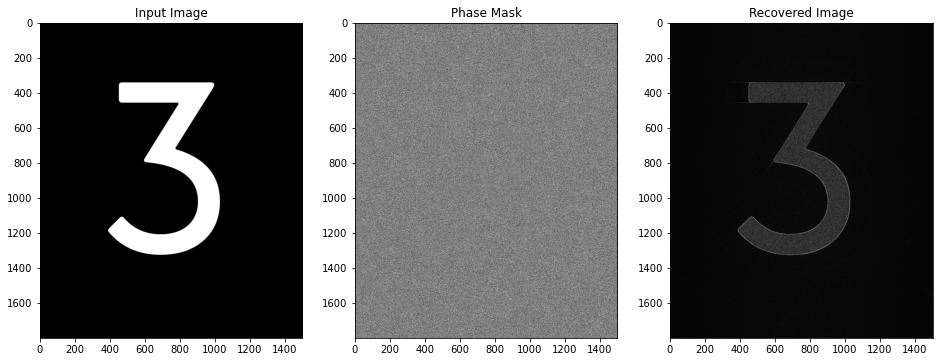

In [5]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(img,cmap="gray")
ax1.title.set_text("Input Image")
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(phase_mask,cmap="gray")
ax2.title.set_text("Phase Mask")
ax3 = fig.add_subplot(2,3,3)
ax3.imshow(recovered_img_mag,cmap="gray")
ax3.title.set_text("Recovered Image")
fig.savefig("1Hologram.png")
plt.show()

### 2 Iterations

In [6]:
img = cv2.imread(r"C:\Users\birge\Documents\Fourrier Optics\IMG\3.bmp", 0)
phase_mask= GXalg(img,2)
signal = np.ones(phase_mask.shape+(2,))
signal[:,:,0] = np.real(np.exp(phase_mask*1j))
signal[:,:,1] = np.imag(np.exp(phase_mask*1j))
recovered_img,recovered_img_mag = idft(signal)

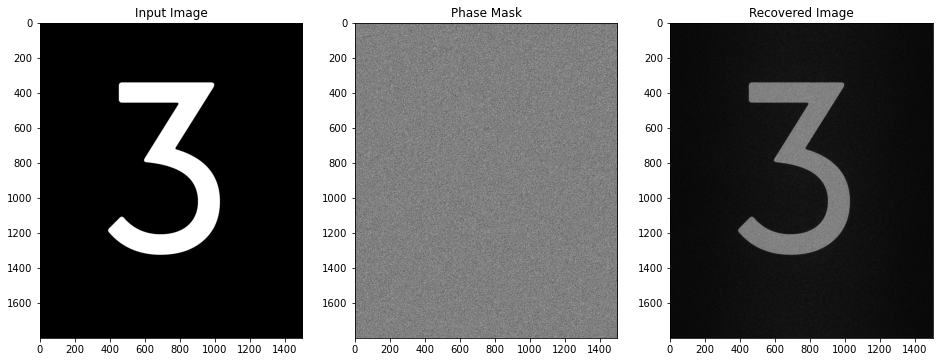

In [7]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(img,cmap="gray")
ax1.title.set_text("Input Image")
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(phase_mask,cmap="gray")
ax2.title.set_text("Phase Mask")
ax3 = fig.add_subplot(2,3,3)
ax3.imshow(recovered_img_mag,cmap="gray")
ax3.title.set_text("Recovered Image")
fig.savefig("2Hologram.png")
plt.show()

### 5 Iterations

In [8]:
img = cv2.imread(r"C:\Users\birge\Documents\Fourrier Optics\IMG\3.bmp", 0)
phase_mask= GXalg(img,5)
signal = np.ones(phase_mask.shape+(2,))
signal[:,:,0] = np.real(np.exp(phase_mask*1j))
signal[:,:,1] = np.imag(np.exp(phase_mask*1j))
recovered_img,recovered_img_mag = idft(signal)

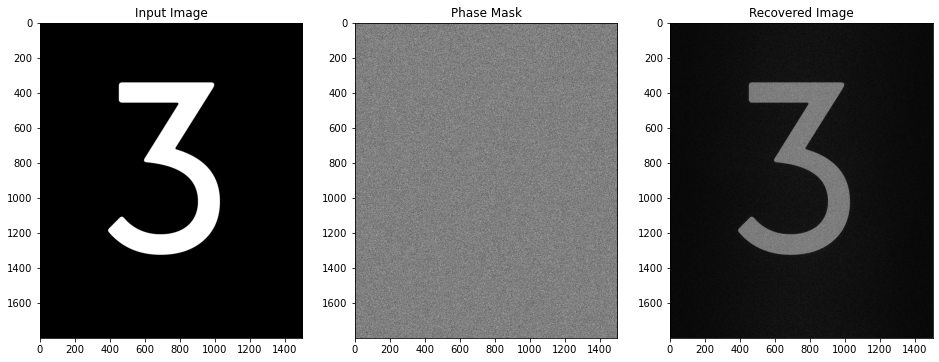

In [9]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(img,cmap="gray")
ax1.title.set_text("Input Image")
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(phase_mask,cmap="gray")
ax2.title.set_text("Phase Mask")
ax3 = fig.add_subplot(2,3,3)
ax3.imshow(recovered_img_mag,cmap="gray")
ax3.title.set_text("Recovered Image")
fig.savefig("5Hologram.png")
plt.show()

### 20 Iterations + Error plot

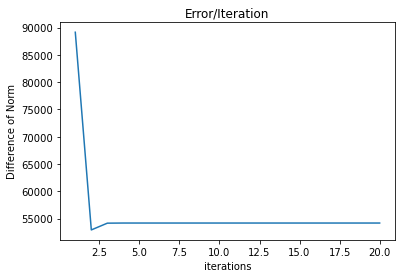

In [10]:
img = cv2.imread(r"C:\Users\birge\Documents\Fourrier Optics\IMG\3.bmp", 0)
phase_mask= GXalg(img,20, err_reduction_plot=True)
signal = np.ones(phase_mask.shape+(2,))
signal[:,:,0] = np.real(np.exp(phase_mask*1j))
signal[:,:,1] = np.imag(np.exp(phase_mask*1j))
recovered_img,recovered_img_mag = idft(signal)

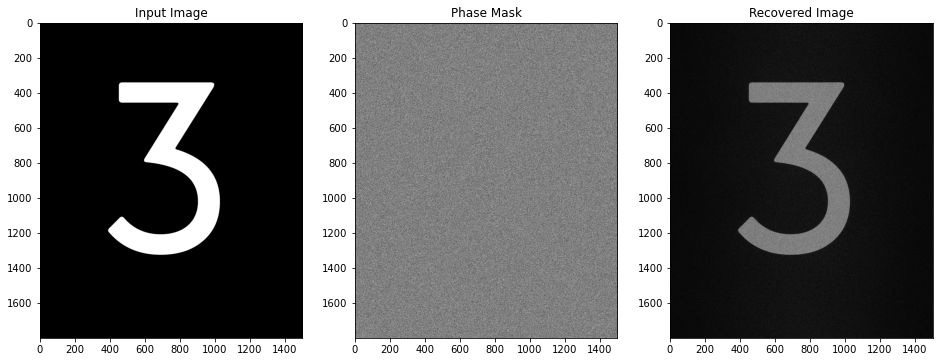

In [11]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(img,cmap="gray")
ax1.title.set_text("Input Image")
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(phase_mask,cmap="gray")
ax2.title.set_text("Phase Mask")
ax3 = fig.add_subplot(2,3,3)
ax3.imshow(recovered_img_mag,cmap="gray")
ax3.title.set_text("Recovered Image")
fig.savefig("20Hologram.png")
plt.show()